# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Importing Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DnYAlv/ML-Mini-Project/main/Mall-Customer/Mall_Customers.csv')

# Data Cleaning

## Checking missing values

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visual Exploratory Data Analysis

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### Checking Correlation

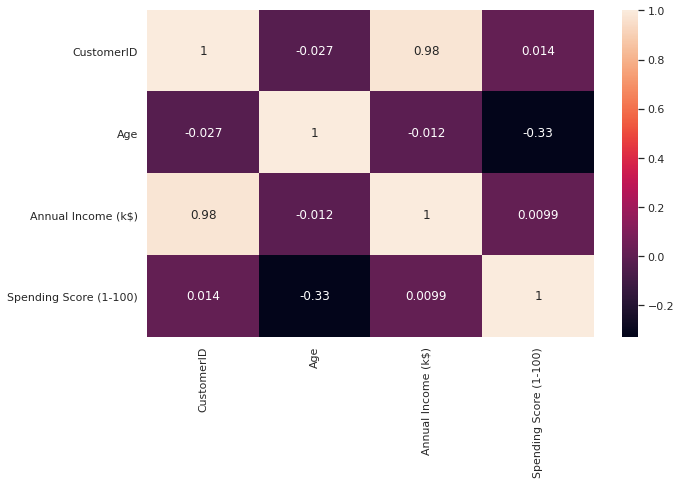

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Dari sini bisa dilihat bahwa korelasi yang positif kuat terdapat pada variabel CustomerID dengan Annual Income (k$). Namun, Age dengan Spending Score memilki korelasi negatif yang kuat


## Visualize between >= 2 Variables

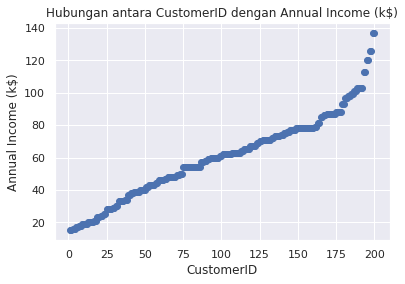

In [ ]:
plt.scatter(df['CustomerID'], df['Annual Income (k$)'])
plt.ylabel('Annual Income (k$)')
plt.xlabel('CustomerID')
plt.title('Hubungan antara CustomerID dengan Annual Income (k$)')
plt.show()

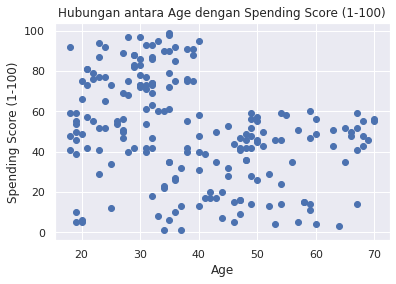

In [ ]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.title('Hubungan antara Age dengan Spending Score (1-100)')
plt.show()

### Checking Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


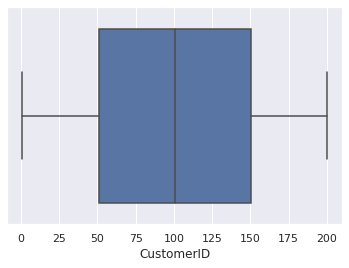

In [ ]:
sns.boxplot(df['CustomerID'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


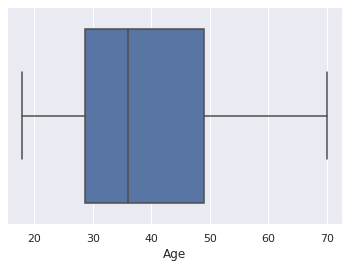

In [ ]:
sns.boxplot(df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


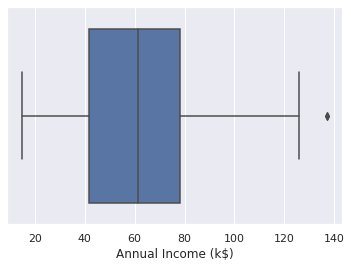

In [ ]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()

- Terdapat outlier di feature Annual Income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


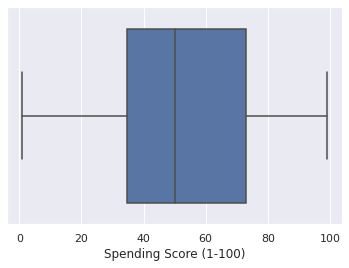

In [ ]:
sns.boxplot(df['Spending Score (1-100)'])
plt.show()

### Checking Distributions

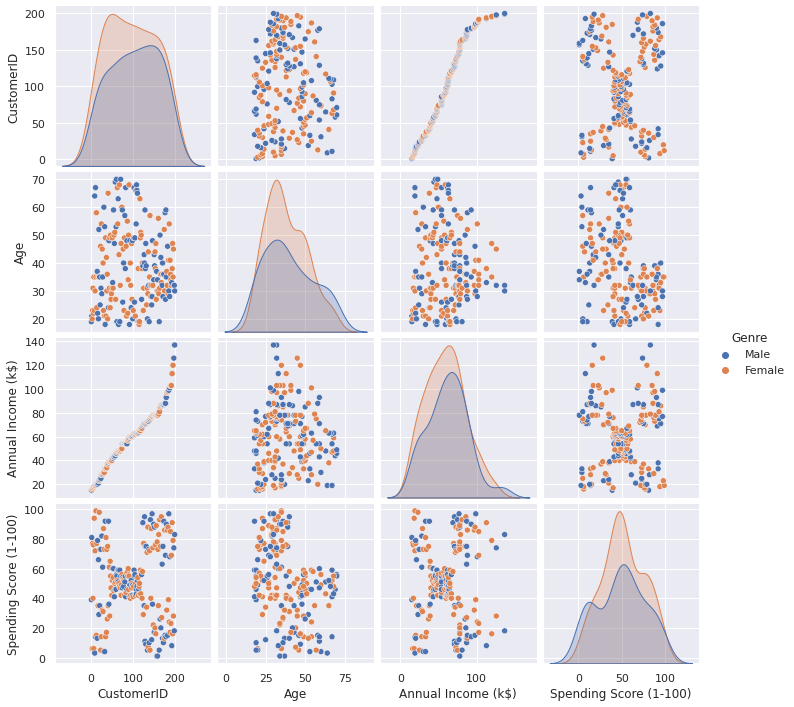

In [ ]:
sns.pairplot(df, hue='Genre')

# Training and testing

In [ ]:
features = ['CustomerID','Genre', 'Age', 'Annual Income (k$)']
X = df[features]
y = df['Spending Score (1-100)']

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [356]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160,)
(40,)


In [357]:
X_train.head()

,CustomerID,Genre,Age,Annual Income (k$)
79,80,Female,49,54
197,198,Male,32,126
38,39,Female,36,37
24,25,Female,54,28
122,123,Female,40,69


## Categorical Variables

In [358]:
s = (X_train.dtypes=='object')
object_cols = list(s[s].index)

object_cols

['Genre']

In [359]:
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH.transform(X_test[object_cols]))

OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [360]:
OH_X_train

,CustomerID,Age,Annual Income (k$),0,1
79,80,49,54,1.0,0.0
197,198,32,126,0.0,1.0
38,39,36,37,1.0,0.0
24,25,54,28,1.0,0.0
122,123,40,69,1.0,0.0
...,...,...,...,...,...
106,107,66,63,1.0,0.0
14,15,37,20,0.0,1.0
92,93,48,60,0.0,1.0
179,180,35,93,0.0,1.0


In [361]:
OH_X_test.head()

,CustomerID,Age,Annual Income (k$),0,1
95,96,24,60,0.0,1.0
15,16,22,20,0.0,1.0
30,31,60,30,0.0,1.0
158,159,34,78,0.0,1.0
128,129,59,71,0.0,1.0


In [362]:
X_train.head()

,CustomerID,Genre,Age,Annual Income (k$)
79,80,Female,49,54
197,198,Male,32,126
38,39,Female,36,37
24,25,Female,54,28
122,123,Female,40,69


- Male = 1, Female = 0

## Training set

In [363]:
OH_X_train

,CustomerID,Age,Annual Income (k$),0,1
79,80,49,54,1.0,0.0
197,198,32,126,0.0,1.0
38,39,36,37,1.0,0.0
24,25,54,28,1.0,0.0
122,123,40,69,1.0,0.0
...,...,...,...,...,...
106,107,66,63,1.0,0.0
14,15,37,20,0.0,1.0
92,93,48,60,0.0,1.0
179,180,35,93,0.0,1.0


In [364]:
OH_X_test.head()

,CustomerID,Age,Annual Income (k$),0,1
95,96,24,60,0.0,1.0
15,16,22,20,0.0,1.0
30,31,60,30,0.0,1.0
158,159,34,78,0.0,1.0
128,129,59,71,0.0,1.0


In [365]:
y_test.head()

95     52
15     79
30      4
158     1
128    11
Name: Spending Score (1-100), dtype: int64

# Modelling (Linear Regression)

In [366]:
model = LinearRegression()
model.fit(OH_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting Spending Score

In [367]:
pred = model.predict(OH_X_test)

## True Value vs Predicted Value

In [368]:
# print(pred)
# print(y_test)
new_columns = pd.DataFrame({
    'y_test':y_test,
    'Predicted':pred
})
new_columns

,y_test,Predicted
95,52,59.365884
15,79,58.928861
30,4,36.677218
158,1,57.553009
128,11,40.832247
115,50,64.889850
69,47,55.215894
170,13,53.704927
174,13,48.237898
45,65,58.771032


# Model Evaluation

## Coefficient

In [369]:
coef_dict = {}

for coef, feat in zip(model.coef_, features):
  coef_dict[feat] = coef

In [370]:
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index')
coef_df.columns = ['Coefficient']
print(coef_df)

                    Coefficient
CustomerID             0.121103
Genre                 -0.580144
Age                   -0.202272
Annual Income (k$)     0.606278


In [371]:
print(f'Mean Absolute Error: {mean_absolute_error(pred, y_test)}')
print(f'RMSE: {np.sqrt(mean_squared_error(pred, y_test))}')
print(f'MSE: {mean_squared_error(pred, y_test)}')

Mean Absolute Error: 18.358290802543745
RMSE: 22.4644898676879
MSE: 504.65330501545225


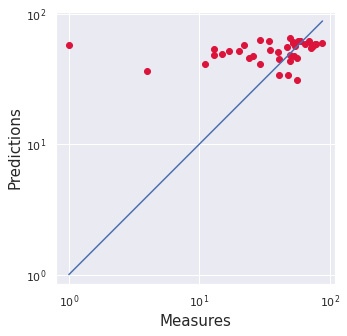

In [374]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Measures', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()